In [2]:
from qutip import *
from qutip.operators import *
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
wc = 1.0  * 2 * np.pi  # cavity frequency
wa = 1.0  * 2 * np.pi  # atom frequency
g  = 0.05 * 2 * np.pi  # coupling strength


N = 15                 # number of cavity fock states
n_th_a = 0.0           # temperature in frequency units
use_rwa = True

tlist = np.linspace(0,50,2000)

In [4]:
# intial state
psi0 = tensor(basis(N,0), basis(2,1))    # start with an excited atom

# operators
a  = tensor(destroy(N), qeye(2))
sm = tensor(qeye(N), destroy(2))
sz = tensor(qeye(N), sigmaz())

# Hamiltonian
if use_rwa:
    H = wc * a.dag() * a + wa * sm.dag() * sm + g * (a.dag() * sm + a * sm.dag())
else:
    H = wc * a.dag() * a + wa * sm.dag() * sm + g * (a.dag() + a) * (sm + sm.dag())

In [5]:
c_op_list = []

gamma_relax = 0.005
gamma_dephase = 0.005


rate = gamma_relax
if rate > 0.0:
    c_op_list.append(np.sqrt(rate) * sm.dag())

rate = gamma_dephase/2
if rate > 0.0:
    c_op_list.append(np.sqrt(rate) * sz)

In [6]:
kappa = 0.005
rate = kappa * (1 + n_th_a)
if rate > 0.0:
    c_op_list.append(np.sqrt(rate) * a)


In [7]:
output = mesolve(H, psi0, tlist, c_op_list, [a.dag() * a, sm.dag() * sm])

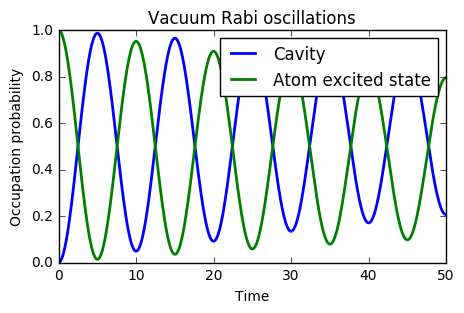

In [8]:
fig, ax = plt.subplots(figsize=(5,3))
ax.plot(tlist, output.expect[0], label="Cavity", linewidth=2)
ax.plot(tlist, output.expect[1], label="Atom excited state", linewidth=2)
ax.legend()
ax.set_xlabel('Time')
ax.set_ylabel('Occupation probability')
ax.set_title('Vacuum Rabi oscillations');